# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&units={units}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | carnarvon
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | torbat-e heydariyeh
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | pundong
Processing Record 8 of Set 1 | vernon
Processing Record 9 of Set 1 | bethel
Processing Record 10 of Set 1 | adamstown
Processing Record 11 of Set 1 | keetmanshoop
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | kone
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | islamkot
Processing Record 17 of Set 1 | isafjordur
Processing Record 18 of Set 1 | papao
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | nabire
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | taiohae
City not found. Skipp

Processing Record 42 of Set 4 | puerto ayora
Processing Record 43 of Set 4 | nova sintra
Processing Record 44 of Set 4 | yangor
City not found. Skipping...
Processing Record 45 of Set 4 | le vauclin
Processing Record 46 of Set 4 | pangkalanbuun
Processing Record 47 of Set 4 | flying fish cove
Processing Record 48 of Set 4 | ennis
Processing Record 49 of Set 4 | junagarh
Processing Record 0 of Set 5 | san jose el alto
Processing Record 1 of Set 5 | weno
Processing Record 2 of Set 5 | hashtpar
Processing Record 3 of Set 5 | panzos
Processing Record 4 of Set 5 | mayen abun
City not found. Skipping...
Processing Record 5 of Set 5 | arkhara
Processing Record 6 of Set 5 | abepura
Processing Record 7 of Set 5 | suva
Processing Record 8 of Set 5 | tidjikja
Processing Record 9 of Set 5 | pitea
Processing Record 10 of Set 5 | vilyuchinsk
Processing Record 11 of Set 5 | kostopil'
Processing Record 12 of Set 5 | bayside
Processing Record 13 of Set 5 | amahai
Processing Record 14 of Set 5 | alesund

Processing Record 32 of Set 8 | onsong
Processing Record 33 of Set 8 | kirensk
Processing Record 34 of Set 8 | klyuchi
Processing Record 35 of Set 8 | rongelap
Processing Record 36 of Set 8 | bozeman
Processing Record 37 of Set 8 | changleng
Processing Record 38 of Set 8 | remire-montjoly
Processing Record 39 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | lompoc
Processing Record 42 of Set 8 | ponta delgada
Processing Record 43 of Set 8 | jamiltepec
Processing Record 44 of Set 8 | opuwo
Processing Record 45 of Set 8 | mabaruma
Processing Record 46 of Set 8 | kotabumi
Processing Record 47 of Set 8 | nadym
Processing Record 48 of Set 8 | beloeil
Processing Record 49 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 0 of Set 9 | kolpashevo
Processing Record 1 of Set 9 | xining
Processing Record 2 of Set 9 | tugulym
Processing Record 3 of Set 9 | langzhong
Processing Record 4 of Set 9 | petropa

Processing Record 21 of Set 12 | little cayman
City not found. Skipping...
Processing Record 22 of Set 12 | antsiranana
Processing Record 23 of Set 12 | rouyn-noranda
Processing Record 24 of Set 12 | viedma
Processing Record 25 of Set 12 | molchanovo
Processing Record 26 of Set 12 | watertown
Processing Record 27 of Set 12 | guanare
Processing Record 28 of Set 12 | nisporeni
Processing Record 29 of Set 12 | labuan lombok
City not found. Skipping...
Processing Record 30 of Set 12 | leua
Processing Record 31 of Set 12 | pangody
-----------------------------
Data Retrieval Complete      
-----------------------------


In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,11.07,95,78,2.75,AU,1701198289
1,carnarvon,-24.8667,113.6333,21.41,64,100,8.65,AU,1701198289
2,egilsstadir,65.2653,-14.3948,4.95,75,75,5.14,IS,1701198290
3,torbat-e heydariyeh,35.2740,59.2195,11.08,63,97,2.89,IR,1701198290
4,waitangi,-43.9535,-176.5597,16.57,90,74,3.13,NZ,1701198291


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [80]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.07,95,78,2.75,AU,1701198289
1,carnarvon,-24.8667,113.6333,21.41,64,100,8.65,AU,1701198289
2,egilsstadir,65.2653,-14.3948,4.95,75,75,5.14,IS,1701198290
3,torbat-e heydariyeh,35.2740,59.2195,11.08,63,97,2.89,IR,1701198290
4,waitangi,-43.9535,-176.5597,16.57,90,74,3.13,NZ,1701198291


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

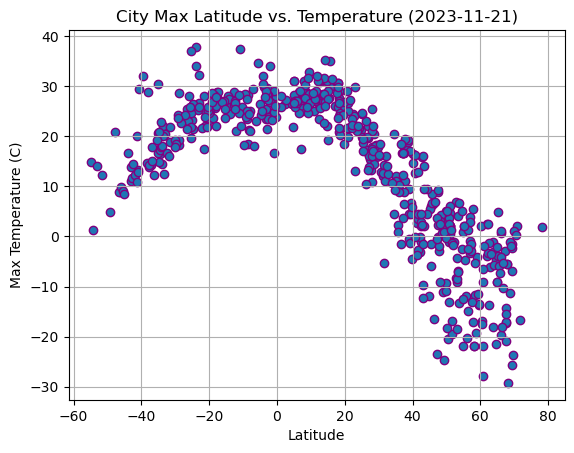

In [49]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="purple")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-11-21)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

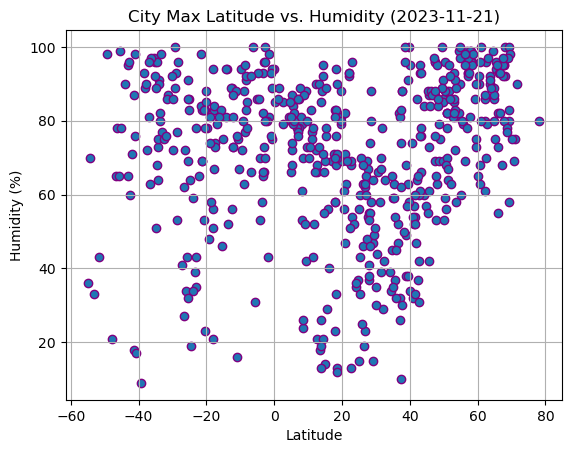

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="purple")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2023-11-21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

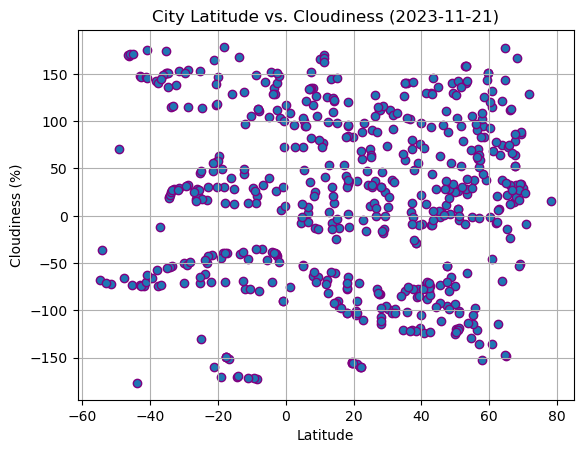

In [51]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Lng"], edgecolors="purple")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-11-21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

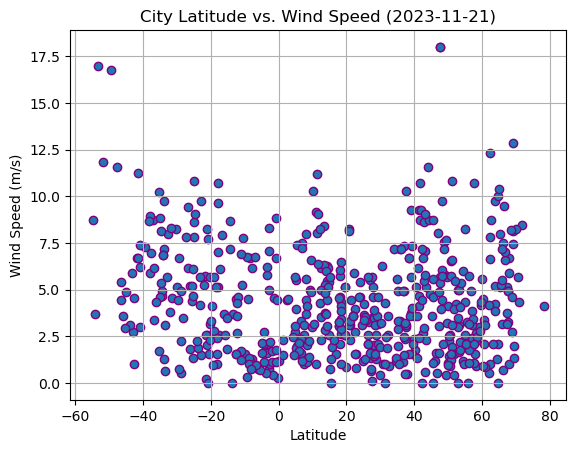

In [52]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="purple")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-11-21)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [53]:
# Define a function to create Linear Regression plots
def plot_linear_regression(xvalue, yvalue, ylabel, text_coordinates):
    
    (s, i , r, p, std_err) = linregress(xvalue, yvalue)
    regress_values = xvalue * s + i
    
    line_equation = "y = " + str(round(s,2)) + "x + " + str(round(i, 2))
    print("The r-value is:", r)
    plt.scatter(xvalue, yvalue)
    plt.plot(xvalue, regress_values, "r")
    plt.annotate(line_equation, text_coordinates, fontsize=15, color="red")
    
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.show()

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,egilsstadir,65.2653,-14.3948,4.95,75,75,5.14,IS,1701198290
3,torbat-e heydariyeh,35.2740,59.2195,11.08,63,97,2.89,IR,1701198290
7,vernon,50.2581,-119.2691,3.34,59,6,2.24,CA,1701198002
8,bethel,41.3712,-73.4140,2.78,57,75,9.26,US,1701198209
11,hasaki,35.7333,140.8333,2.22,37,0,3.31,JP,1701198293


In [79]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,11.07,95,78,2.75,AU,1701198289
1,carnarvon,-24.8667,113.6333,21.41,64,100,8.65,AU,1701198289
4,waitangi,-43.9535,-176.5597,16.57,90,74,3.13,NZ,1701198291
5,margaret river,-33.9500,115.0667,14.53,91,4,1.29,AU,1701198291
6,pundong,-7.9522,110.3486,24.97,85,80,1.30,ID,1701198291


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8863025847551304


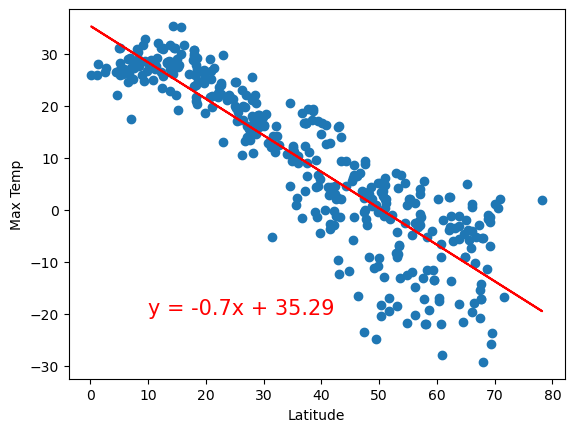

In [64]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 'Max Temp', (10,-20))

The r-value is: 0.6616091282171275


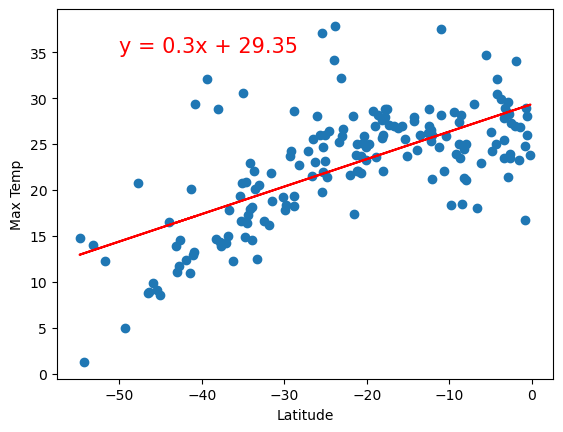

In [63]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 'Max Temp', (-50, 35))

---

The analysis of both hemispheres highlights a hemispheric contrast relationship between latitude and maximum temperature. In the Northern Hemisphere, the temperature tends to decrease as you move away from the equator, while in the Southern Hemisphere, the temperature tends to increase as you move towards the equator.

---


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.34897128880221073


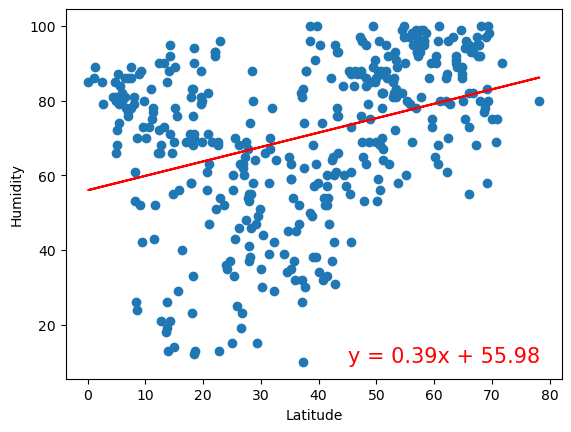

In [36]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 'Humidity', (45,10))

The r-value is: 0.1380774434591006


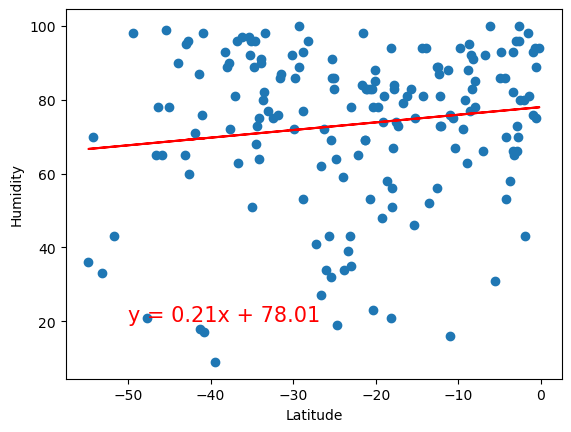

In [74]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 'Humidity', (-50,20))

---

The linear regression analysis for the Northern Hemisphere indicates a very weak positive correlation between latitude and humidity. The analysis suggests that on average as one moves away from the equator and towards higher latitudes in the Northern Hemisphere, there is a minimal tendency for humidity to increase.

The linear regression analysis between latitude and humidity in the Southern Hemisphere suggests on average as one moves towards the equator and higher latitudes in the Southern Hemisphere, there is a faint tendency for humidity to increase.

---


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.22341624912734812


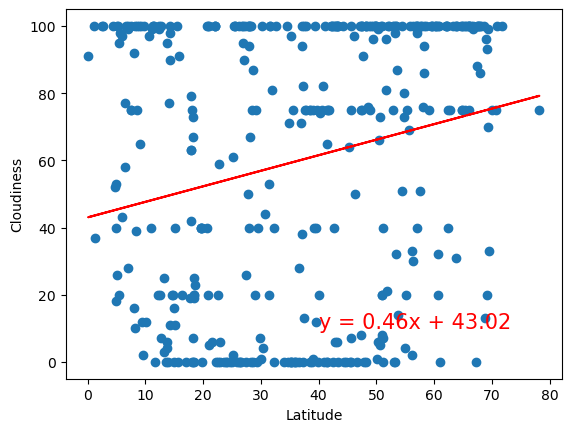

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 'Cloudiness', (40,10))

The r-value is: 0.060277121823286296


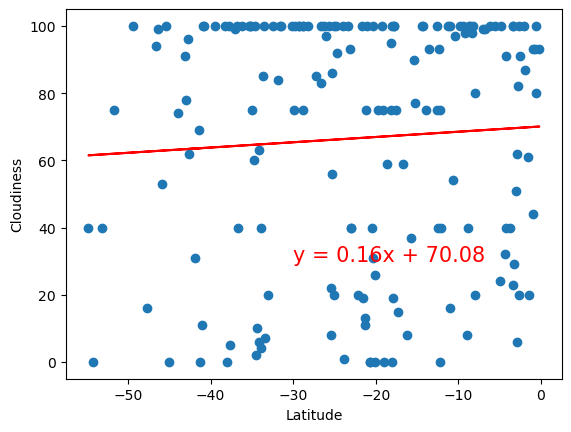

In [68]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 'Cloudiness', (-30,30))

---

Both hemispheres show weak positive correlations, implying that latitude has a limited influence on cloudiness levels.

---

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10947623709131768


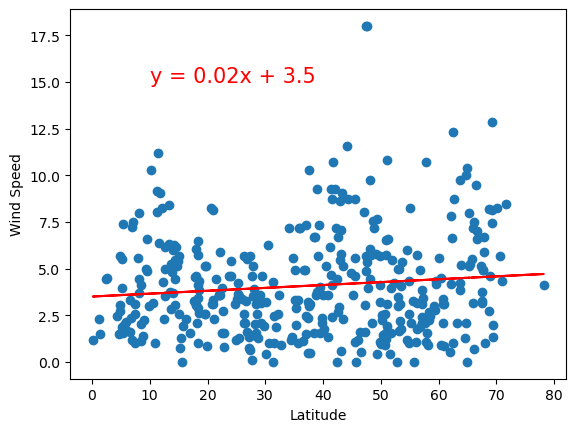

In [72]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 'Wind Speed', (10,15))

The r-value is: -0.43221886894050393


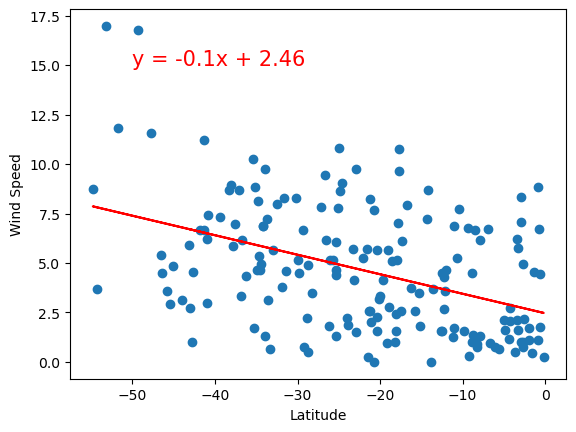

In [73]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 'Wind Speed', (-50,15))

---

Both hemispheres show weak to moderate correlations, suggesting that latitude has some influence on wind speed, but the relationships are not very strong.

---